In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
df = pd.read_csv('/content/drive/MyDrive/AI_Tools_Assignment/practical/iris.csv')


NameError: name 'pd' is not defined

In [9]:
import pandas as pd


In [11]:
df = pd.read_csv('/content/drive/MyDrive/AI_Tools_Assignment/practical/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
# Target column
target_col = 'Species'  # Capitalized to match your CSV

# Handle missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Features (drop target)
X = df.drop(target_col, axis=1)
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode labels
y = LabelEncoder().fit_transform(df[target_col])

# Check shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (150, 5)
Target shape: (150,)


In [15]:
from sklearn.model_selection import train_test_split

# Split 80% train, 20% test, stratify by target to keep class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (120, 5) (120,)
Test set: (30, 5) (30,)


In [16]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



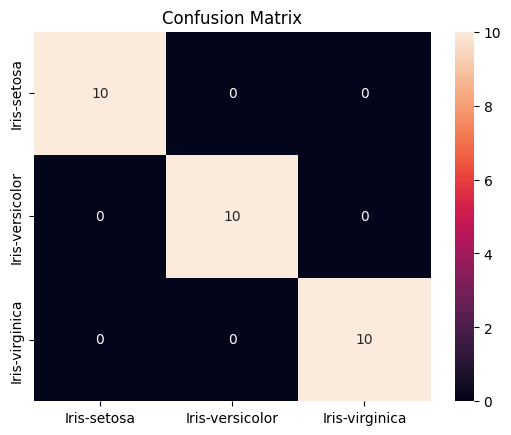

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=df[target_col].unique(),
            yticklabels=df[target_col].unique())
plt.title("Confusion Matrix")
plt.show()


In [18]:
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (150, 5)
Target shape: (150,)


In [19]:
print("Decision Tree model trained successfully!")


Decision Tree model trained successfully!


In [20]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



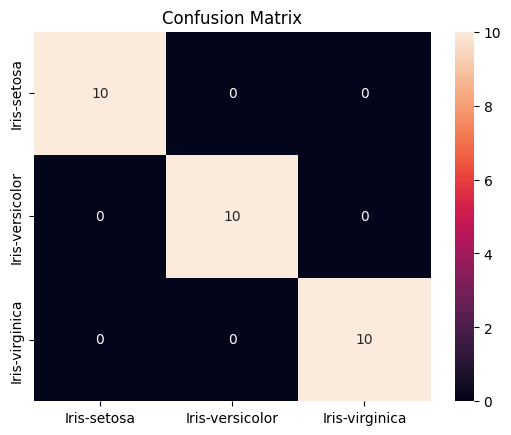

In [21]:
sns.heatmap(cm, annot=True, fmt='d', xticklabels=df[target_col].unique(),
            yticklabels=df[target_col].unique())
plt.title("Confusion Matrix")
plt.show()


In [13]:
print(df.columns)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
